# Note Occurences on Significant Beats in Turkish Makam Music

### Load Necessary Packages

In [1]:
from music21 import *
import os
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET
import numpy as np
import json

### Specify Necessary Directories

In [2]:
dir = "SymbTr-2.4.3/MusicXML"
mod_dir = "NoKeySignature"

### Extract MusicXML files contain the Makam + Usul Combination of the following Makams and Usuls:
#### Makams: Rast, Hicaz, Acemasiran
#### Usuls: Aksak, Aksaksemai, Curcuna

In [3]:
# check if makam_dict.json does not exist
if not os.path.exists('makam_dict.json'):
    makam_dict = {}

    # Define dictionaries for makam prefixes and their corresponding keys
    makams = {
        "rast": "rast--",
        "hicaz": "hicaz--",
        "acemasiran": "acemasiran--"
    }

    suffixes = {
        "aksaksemai": "--aksaksemai--",
        "aksak": "--aksak--",
        "curcuna": "--curcuna--"
    }
    flag = False

    # Iterate through each file in the directory
    for filename in os.listdir(dir):
        # Check each makam prefix
        for makam_key, makam_prefix in makams.items():
            if makam_key == "hicaz":
                flag = True
            else:
                flag = False
            if filename.startswith(makam_prefix):
                # Initialize the makam dictionary if it doesn't exist
                if makam_key not in makam_dict:
                    makam_dict[makam_key] = {}
                # Check each suffix
                for suffix_key, suffix_value in suffixes.items():
                    if suffix_value in filename:
                        # Initialize the suffix key in the makam dictionary if it doesn't exist
                        if suffix_key not in makam_dict[makam_key]:
                            makam_dict[makam_key][suffix_key] = []
                        if flag:
                            file_path = dir + "/" + filename
                            tree = ET.parse(file_path)
                            root = tree.getroot()
                            for att in root.iter('attributes'):
                                if att.find('key') != None:
                                    att.remove(att.find('key'))
                                    
                            newFilename = mod_dir + "/" + filename[:-4] + '--noKeySignature.xml'
                            new_file_path = dir + "/" + newFilename
                            tree.write(new_file_path) 
                            filename = newFilename  
                        # Append the filename to the corresponding suffix key
                        makam_dict[makam_key][suffix_key].append(filename)

    print(makam_dict)

    # Save the makam dictionary to a json file
    with open('makam_dict.json', 'w') as f:
        json.dump(makam_dict, f, indent=4)

else:
    # Load the makam dictionary from the json file
    with open('makam_dict.json', 'r') as f:
        makam_dict = json.load(f)
    
    print(makam_dict)

{'hicaz': {'aksak': ['NoKeySignature/hicaz--turku--aksak--gemilerde_talim----noKeySignature.xml', 'NoKeySignature/hicaz--turku--aksak--pencere_acildi----noKeySignature.xml', 'NoKeySignature/hicaz--sarki--aksak--kis_geldi--sevki_bey--noKeySignature.xml', 'NoKeySignature/hicaz--rumeliturkusu--aksak--yine_de--rumeli--noKeySignature.xml', 'NoKeySignature/hicaz--sarki--aksak--beni_sev--misirli_udi_ibrahim_efendi--noKeySignature.xml', 'NoKeySignature/hicaz--turku--aksak--necibemin_ikidir--istanbul--noKeySignature.xml', 'NoKeySignature/hicaz--sarki--aksak--bir_an--omer_sami_gupgup--noKeySignature.xml', 'NoKeySignature/hicaz--zeybek--aksak----izmir--noKeySignature.xml', 'NoKeySignature/hicaz--sarki--aksak--sen_bu_yerden--sevki_bey--noKeySignature.xml', 'NoKeySignature/hicaz--turku--aksak--ihtiyatlar_silah----noKeySignature.xml', 'NoKeySignature/hicaz--sarki--aksak--dil_yaresini--sevki_bey--noKeySignature.xml', 'NoKeySignature/hicaz--sarki--aksak--bilmiyorum--sevki_bey--noKeySignature.xml', 'No

In [4]:
# Total number of files extracted
count = 0
for makam_key, makam_value in makam_dict.items():
    for suffix_key, suffix_value in makam_value.items():
        count += len(suffix_value)
print(count)

73


### Identifying the Tonic of Each Makam

In [5]:
# Go through all the pieces in the makam_dict and find the most occurring last note in each piece for each makam, and store it in a dictionary
last_note_dict = {}
for makam in makam_dict:
    if makam not in last_note_dict:
        last_note_dict[makam] = {}
    for usul in makam_dict[makam]:
        for filename in makam_dict[makam][usul]:
            file_path = dir + "/" + filename
            current_file = converter.parse(file_path)
            nn = current_file.flat.notes.stream()
            last_note = nn[-1]
            last_note_name = last_note.nameWithOctave
            if last_note_name not in last_note_dict[makam]:
                last_note_dict[makam][last_note_name] = 0
            last_note_dict[makam][last_note_name] += 1

print(last_note_dict)

{'hicaz': {'A4': 38}, 'rast': {'G4': 19}, 'acemasiran': {'F4': 16}}


In [6]:
tonic_dict = {}
for key in last_note_dict:
    max_note = max(last_note_dict[key], key=last_note_dict[key].get)
    tonic_dict[key] = max_note

print(tonic_dict) 

{'hicaz': 'A4', 'rast': 'G4', 'acemasiran': 'F4'}


### Identifying the Leading Note of Each Makam using Two Methods:

#### Penultimate Note of the Makam Method:

In [7]:
penultimate_note_dict = {}
for makam in makam_dict:
    if makam not in penultimate_note_dict:
        penultimate_note_dict[makam] = {}
    for usul in makam_dict[makam]:
        for filename in makam_dict[makam][usul]:
            file_path = dir + "/" + filename
            current_file = converter.parse(file_path)
            nn = current_file.flat.notes.stream()
            last_note = nn[-2]
            last_note_name = last_note.nameWithOctave
            iterator = -3
            while last_note_name == tonic_dict[makam]:
                last_note = nn[iterator]
                last_note_name = last_note.nameWithOctave
                iterator -= 1
            if last_note_name not in penultimate_note_dict[makam]:
                penultimate_note_dict[makam][last_note_name] = 0
            penultimate_note_dict[makam][last_note_name] += 1

print(penultimate_note_dict)

{'hicaz': {'B4': 34, 'C#5': 2, 'G4': 2}, 'rast': {'A4': 13, 'F#4': 4, 'B`4': 1, 'D4': 1}, 'acemasiran': {'A4': 1, 'G4': 3, 'E4': 12}}


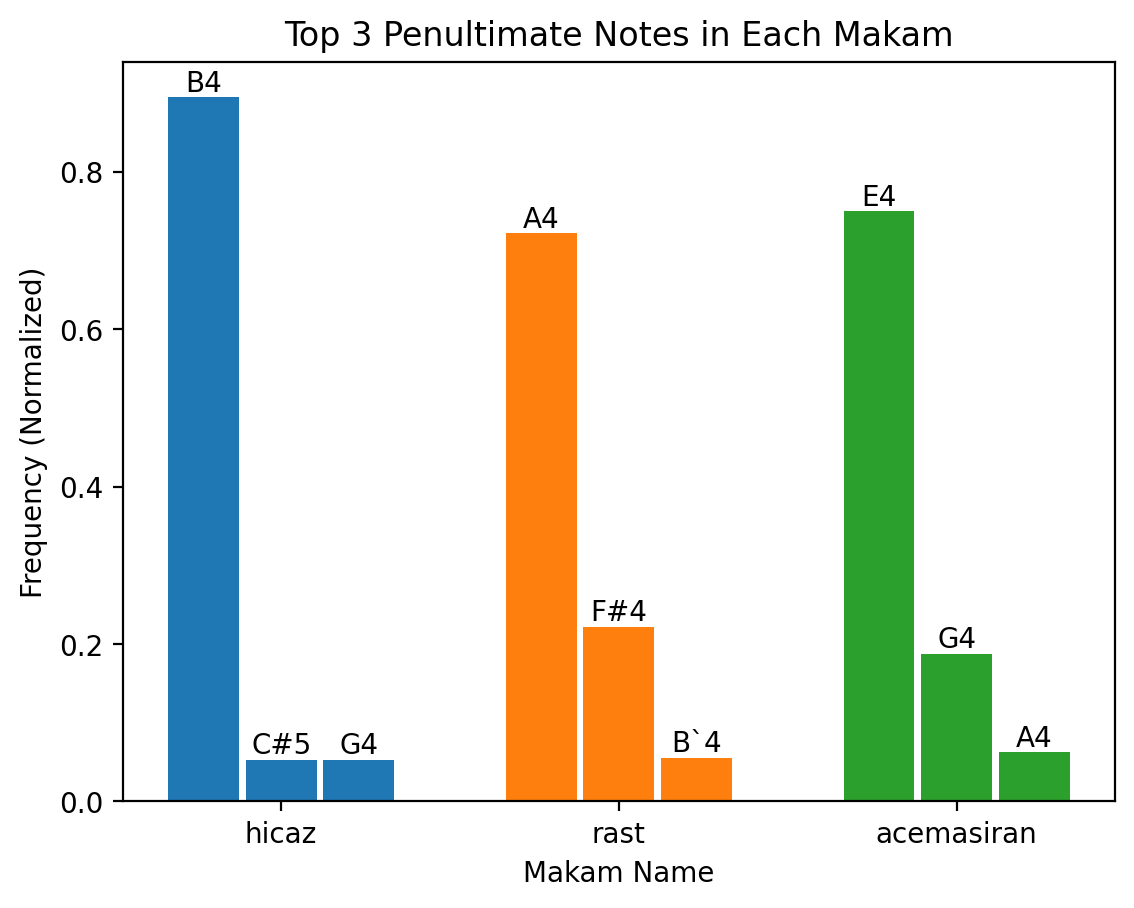

In [8]:
# Sort the penultimate_note_dict values to contain the top 3 most occurring notes
for makam in penultimate_note_dict:
    penultimate_note_dict[makam] = dict(sorted(penultimate_note_dict[makam].items(), key=lambda item: item[1], reverse=True)[:3])

# Normalize the penultimate_note_dict values
for makam in penultimate_note_dict:
    total = sum(penultimate_note_dict[makam].values())
    for note in penultimate_note_dict[makam]:
        penultimate_note_dict[makam][note] /= total

# Plot a grouped bar chart for the penultimate notes, and label each bar with the note name
fig, ax = plt.subplots()
barWidth = 0.23
bar1 = np.arange(len(penultimate_note_dict["rast"]))
bar2 = [x + barWidth for x in bar1]
bar3 = [x + barWidth for x in bar2]

for i, makam in enumerate(penultimate_note_dict):
    ax.bar([bar1[i], bar2[i], bar3[i]], penultimate_note_dict[makam].values(), (barWidth-0.02), label=makam)

# add the note names on top of the bars
for i, makam in enumerate(penultimate_note_dict):
    for j, note in enumerate(penultimate_note_dict[makam]):
        ax.text([bar1[i], bar2[i], bar3[i]][j], penultimate_note_dict[makam][note], note, ha='center', va='bottom')

ax.set_xlabel('Makam Name')
ax.set_ylabel('Frequency (Normalized)')
ax.set_title('Top 3 Penultimate Notes in Each Makam')
ax.set_xticks([bar + barWidth for bar in range(len(penultimate_note_dict["rast"]))])
ax.set_xticklabels(penultimate_note_dict.keys())
plt.show()


In [9]:
# Find the most common penultimate note for each makam
penultimate_tonic_dict = {}
for key in penultimate_note_dict:
    max_note = max(penultimate_note_dict[key], key=penultimate_note_dict[key].get)
    penultimate_tonic_dict[key] = max_note

print(penultimate_tonic_dict)

{'hicaz': 'B4', 'rast': 'A4', 'acemasiran': 'E4'}


#### Method Extracting the Note Preceding the Tonic:

In [10]:
# For each piece in makam_dict, find each note that precedes the tonic note for that makam, as well as its count, and store it in a dictionary
preceding_notes_dict = {}
for makam in makam_dict:
    if makam not in preceding_notes_dict:
        preceding_notes_dict[makam] = {}
    for usul in makam_dict[makam]:
        for filename in makam_dict[makam][usul]:
            file_path = dir + "/" + filename
            current_file = converter.parse(file_path)
            nn = current_file.flat.notes.stream()
            for i in range(len(nn)):
                if nn[i].nameWithOctave == tonic_dict[makam]:
                    if i != 0:
                        preceding_note = nn[i-1].nameWithOctave
                        if preceding_note == tonic_dict[makam]:
                            continue
                        if preceding_note not in preceding_notes_dict[makam]:
                            preceding_notes_dict[makam][preceding_note] = 0
                        preceding_notes_dict[makam][preceding_note] += 1

# Store only the top 3 preceding notes for each makam
for makam in preceding_notes_dict:
    preceding_notes_dict[makam] = dict(sorted(preceding_notes_dict[makam].items(), key=lambda item: item[1], reverse=True)[:3])
print(preceding_notes_dict)

{'hicaz': {'B4': 855, 'G4': 187, 'C#5': 54}, 'rast': {'A4': 360, 'F#4': 60, 'B`4': 57}, 'acemasiran': {'G4': 148, 'E4': 88, 'A4': 24}}


In [11]:
# normalize the counts of the preceding notes
for makam in preceding_notes_dict:
    total = sum(preceding_notes_dict[makam].values())
    for note in preceding_notes_dict[makam]:
        preceding_notes_dict[makam][note] /= total
print(preceding_notes_dict)

{'hicaz': {'B4': 0.7801094890510949, 'G4': 0.17062043795620438, 'C#5': 0.04927007299270073}, 'rast': {'A4': 0.7547169811320755, 'F#4': 0.12578616352201258, 'B`4': 0.11949685534591195}, 'acemasiran': {'G4': 0.5692307692307692, 'E4': 0.3384615384615385, 'A4': 0.09230769230769231}}


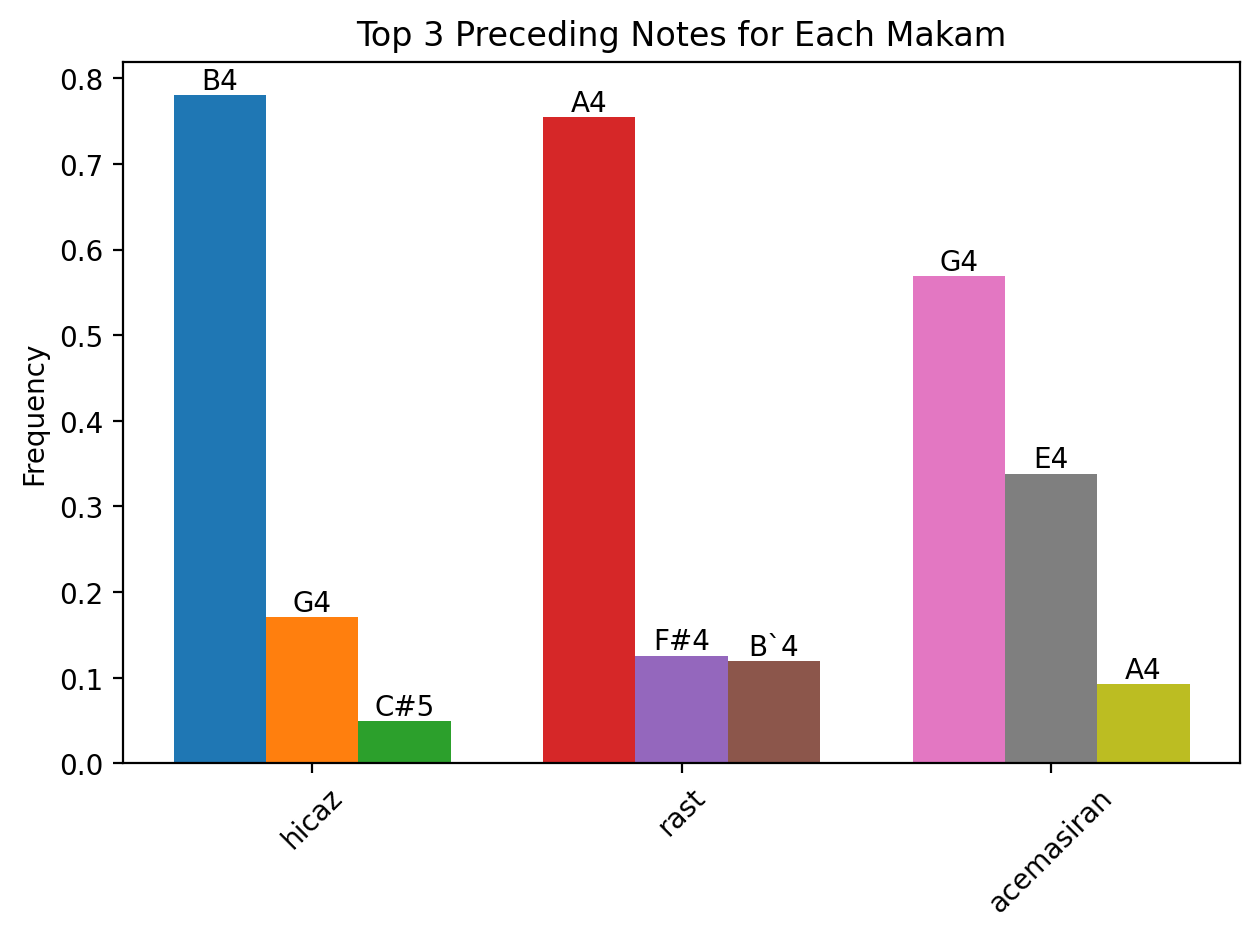

In [12]:
fig, ax = plt.subplots()
width = 0.25
ind = np.arange(len(preceding_notes_dict))
for i, makam in enumerate(preceding_notes_dict):
    ax.bar(i, list(preceding_notes_dict[makam].values())[0], width, label=list(preceding_notes_dict[makam].keys())[0])
    ax.bar(i + width, list(preceding_notes_dict[makam].values())[1], width, label=list(preceding_notes_dict[makam].keys())[1])
    ax.bar(i + 2*width, list(preceding_notes_dict[makam].values())[2], width, label=list(preceding_notes_dict[makam].keys())[2])
ax.set_xticks(ind + width)
ax.set_xticklabels(preceding_notes_dict.keys())

# add the note names on top of the bars
for i, makam in enumerate(preceding_notes_dict):
    for j, note in enumerate(preceding_notes_dict[makam]):
        ax.text(i + j*width, preceding_notes_dict[makam][note], note, ha='center', va='bottom')

plt.ylabel('Frequency')
plt.title('Top 3 Preceding Notes for Each Makam')
plt.xticks(rotation=45)
plt.tight_layout()


plt.show()


### Verifying the Significant/Accentuated Beats of Each Usul:

In [13]:
aksaksemaiBeats = [1.0, 4.0, 6.0, 8.0]
aksakBeats = [1.0, 3.0, 5.0, 7.0]
curcunaBeats = [1.0, 4.0, 6.0, 8.0]

makam_usul_count = {}

for makam in makam_dict:
    for usul in makam_dict[makam]:
        if usul not in makam_usul_count:
            makam_usul_count[usul] = {}
        for filename in makam_dict[makam][usul]:
            file_path = dir + "/" + filename
            current_file = converter.parse(file_path)
            nn = current_file.flat.notes.stream()
            for n in nn:
                if usul == "aksak":
                    new_beat = (n.beat * 3) - 2
                    makam_usul_count[usul][new_beat] = makam_usul_count[usul].get(new_beat, 0) + 1
                else:
                    makam_usul_count[usul][n.beat] = makam_usul_count[usul].get(n.beat, 0) + 1

print(makam_usul_count)




{'aksak': {1.0: 1695, Fraction(2, 1): 745, 2.5: 568, Fraction(3, 1): 1384, 4.0: 1475, Fraction(9, 2): 549, Fraction(5, 1): 1678, 5.5: 390, Fraction(6, 1): 1169, Fraction(13, 2): 533, 7.0: 1673, Fraction(15, 2): 307, Fraction(8, 1): 964, 8.5: 343, Fraction(9, 1): 1233, Fraction(19, 2): 458, Fraction(7, 2): 278, Fraction(3, 2): 253, Fraction(28, 3): 21, Fraction(29, 3): 20, Fraction(13, 3): 8, Fraction(14, 3): 5, Fraction(23, 4): 24, Fraction(7, 3): 20, Fraction(8, 3): 17, Fraction(4, 3): 2, Fraction(5, 3): 5, 1.75: 45, Fraction(10, 3): 7, Fraction(11, 3): 10, Fraction(33, 4): 6, 4.75: 17, 1.375: 10, Fraction(9, 4): 18, Fraction(11, 4): 2, Fraction(16, 3): 8, Fraction(17, 3): 19, Fraction(27, 8): 3, Fraction(15, 4): 7, 7.75: 35, Fraction(39, 4): 6, 4.375: 4, 9.25: 2, Fraction(21, 4): 6, Fraction(19, 3): 11, Fraction(26, 3): 11, Fraction(22, 3): 10, Fraction(23, 3): 10, Fraction(25, 3): 10, Fraction(5, 4): 10, 3.25: 2, Fraction(17, 4): 7, Fraction(73, 8): 2, Fraction(29, 4): 17}, 'aksakse

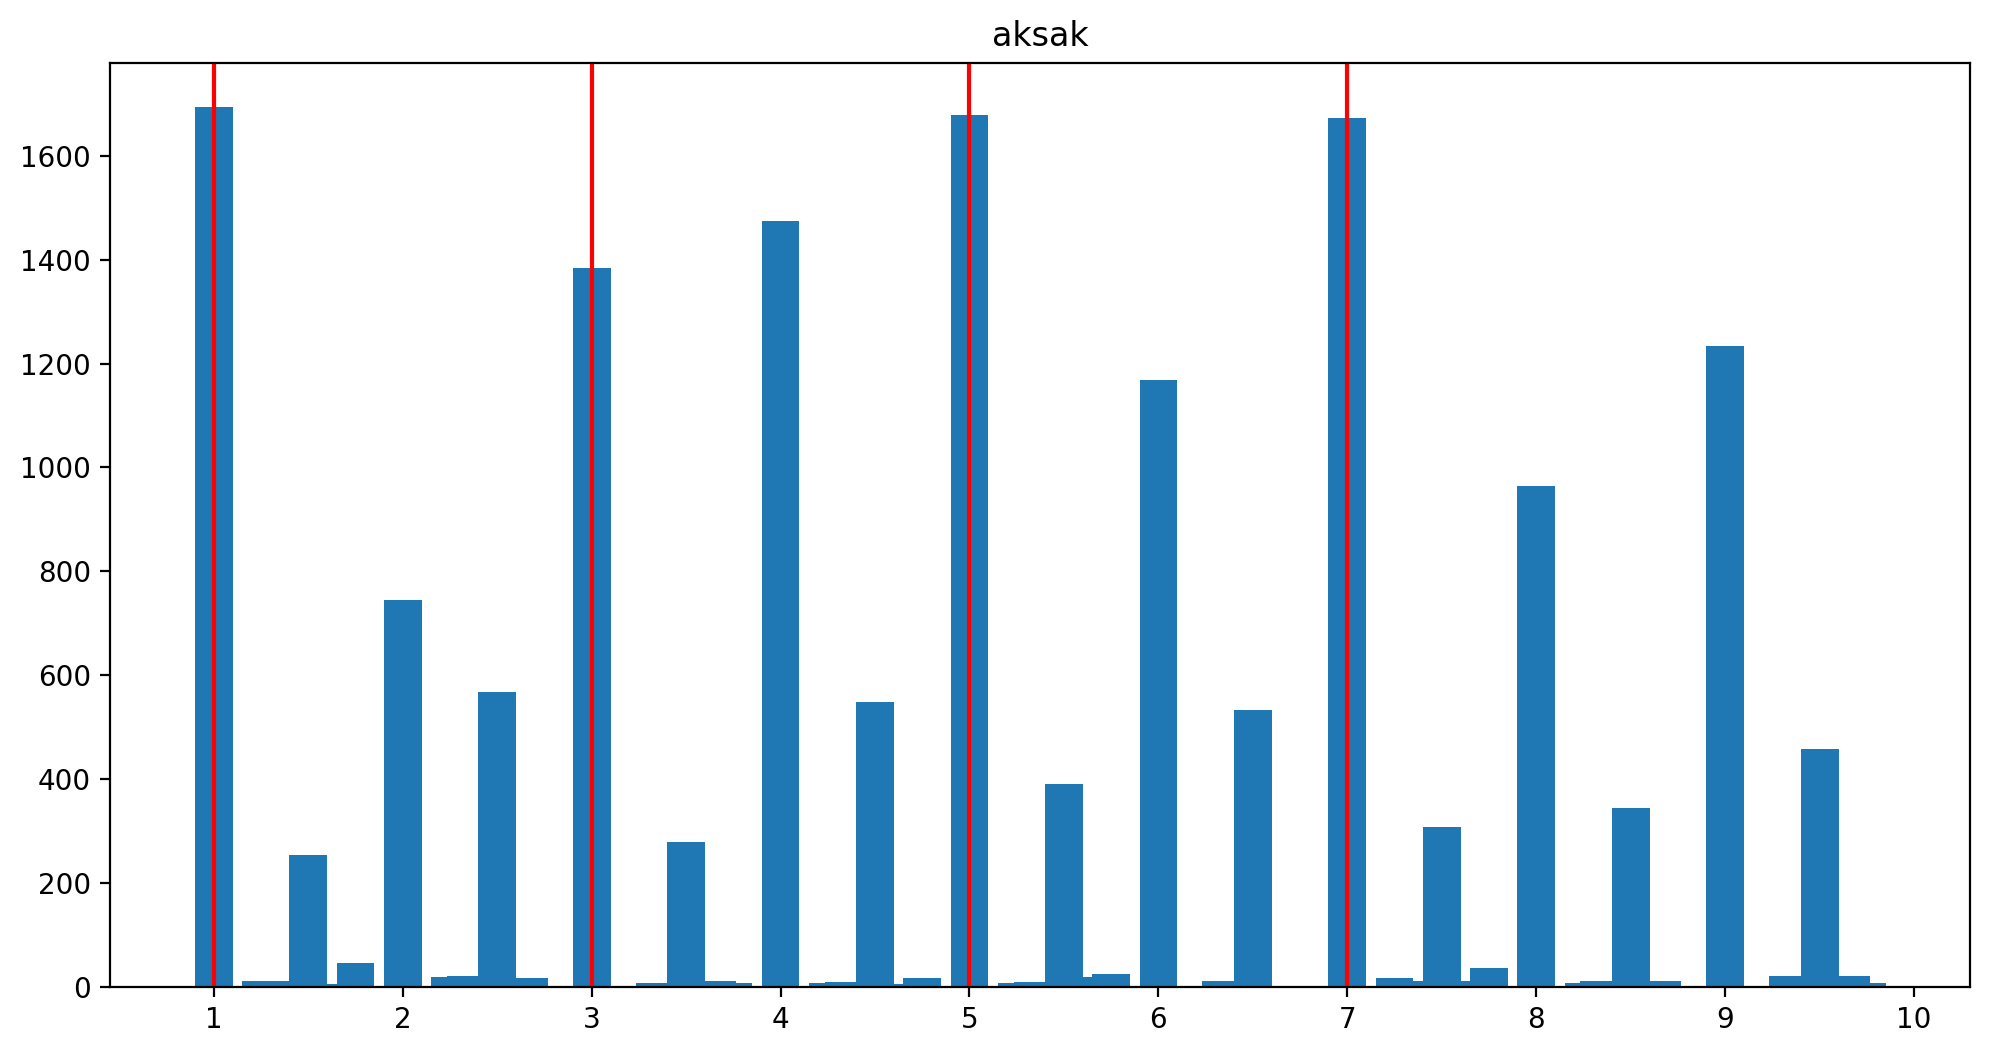

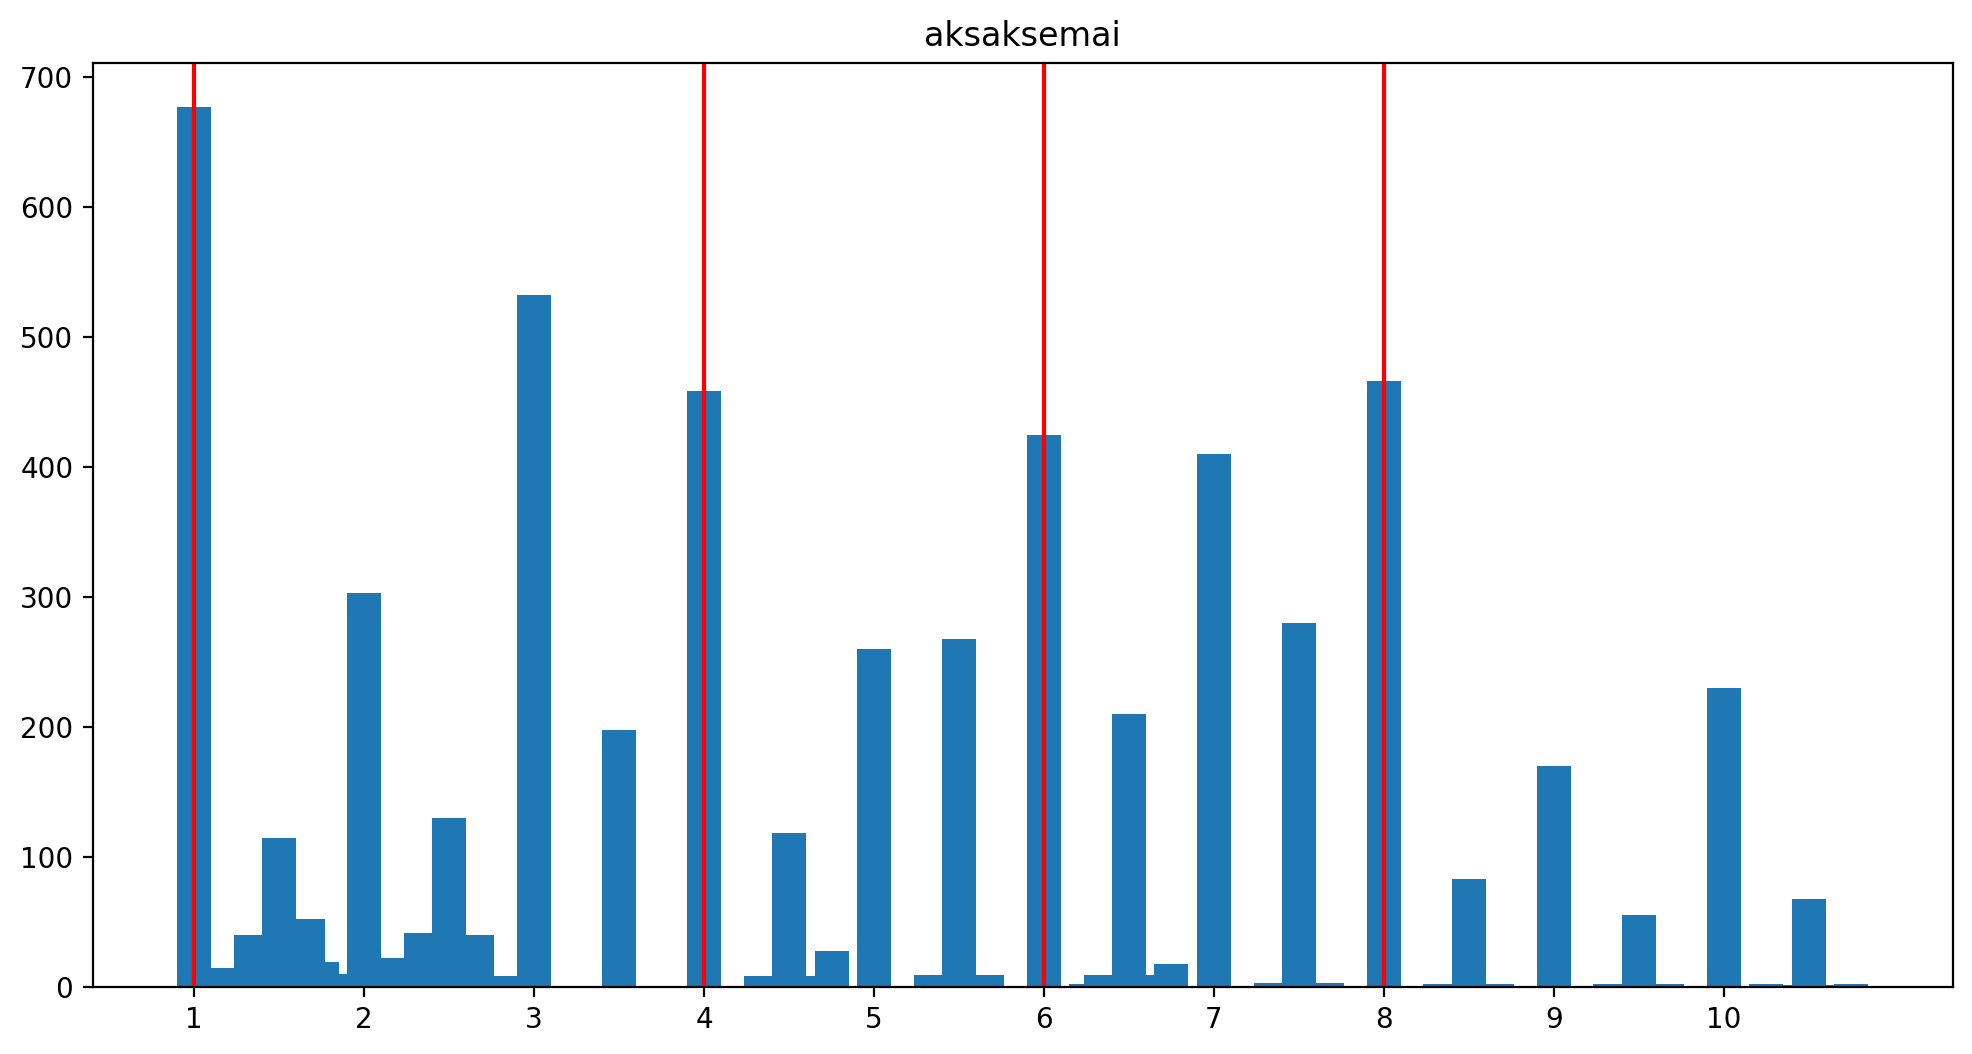

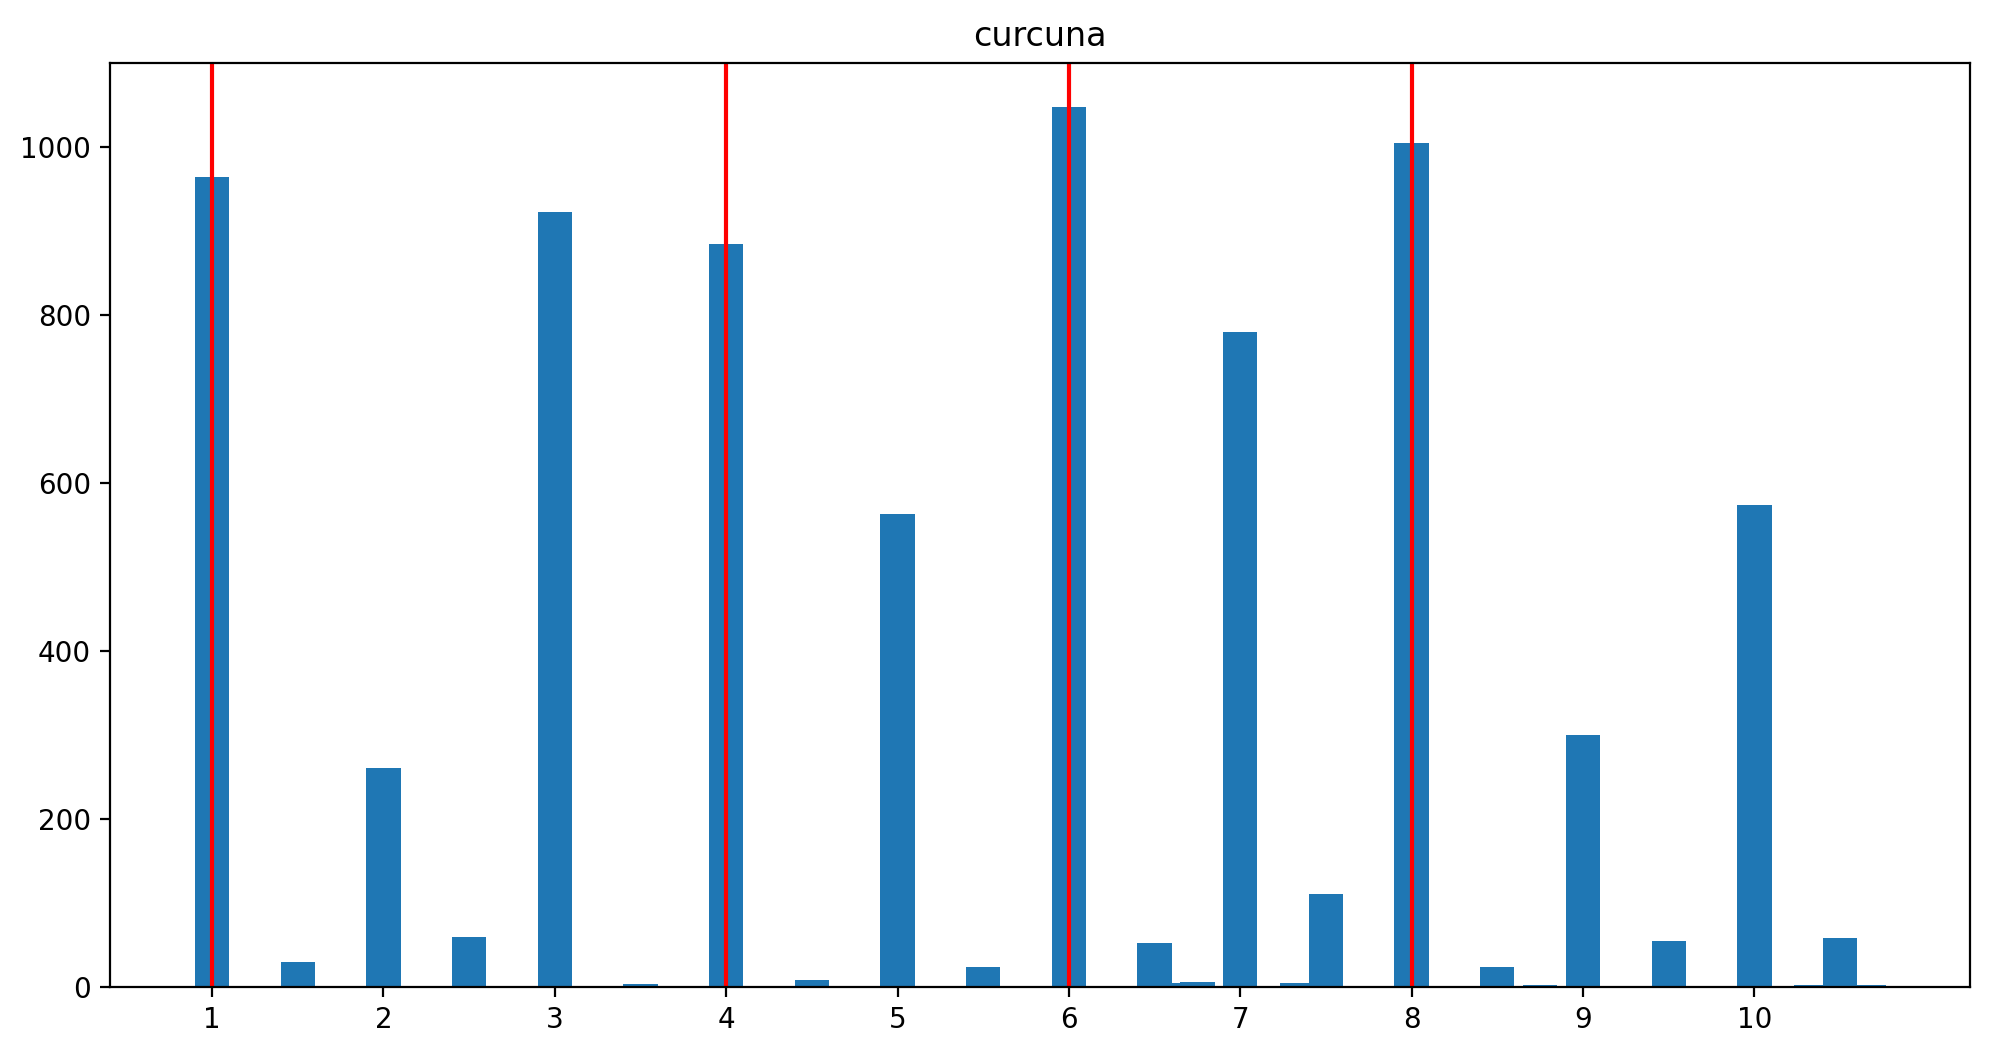

In [14]:
# Plot the number of notes in each beat for each makam-usul combination
for combo in makam_usul_count:
    xValues = sorted(makam_usul_count[combo].keys())
    yValues = [makam_usul_count[combo][x] for x in xValues]
    plt.figure(figsize=(12, 6))
    plt.bar(xValues, yValues, width=0.2)
    # Draw a vertical red line to better compare the results with theory 
    if "aksaksemai" in combo: 
        for beat in aksaksemaiBeats:
            plt.axvline(beat, color='red')
    elif "aksak" in combo:
        for beat in aksakBeats:
            plt.axvline(beat, color='red')
    elif "curcuna" in combo:
        for beat in curcunaBeats:
            plt.axvline(beat, color='red')
    plt.xticks(range(1, 11))
    plt.title(combo)
    plt.show()

### Identifying the Most Occuring Notes at Significant Beats for Each Makam and Usul Combination:

In [15]:
# Create a dictionary to store the notes and their durations for each makam-usul combination
note_beat_dict = {}

for makam in makam_dict:
    for usul in makam_dict[makam]:
        makamUsul = makam + "--" + usul
        if makamUsul not in note_beat_dict:
            note_beat_dict[makamUsul] = {}
        for filename in makam_dict[makam][usul]:
            file_path = dir + "/" + filename
            current_file = converter.parse(file_path)
            nn = current_file.flat.notes.stream()
            for n in nn:
                if usul == "aksak":
                    new_beat = (n.beat * 3) - 2
                    if new_beat in aksakBeats:
                        if new_beat not in note_beat_dict[makamUsul].keys():
                            note_beat_dict[makamUsul][new_beat] = {}
                        if n.nameWithOctave not in note_beat_dict[makamUsul][new_beat].keys():
                            note_beat_dict[makamUsul][new_beat][n.nameWithOctave] = 0
                        note_beat_dict[makamUsul][new_beat][n.nameWithOctave] += n.beatDuration.quarterLength
                if usul == "aksaksemai":
                    if n.beat in aksaksemaiBeats:
                        if n.beat not in note_beat_dict[makamUsul].keys():
                            note_beat_dict[makamUsul][n.beat] = {}
                        if n.nameWithOctave not in note_beat_dict[makamUsul][n.beat].keys():
                            note_beat_dict[makamUsul][n.beat][n.nameWithOctave] = 0
                        note_beat_dict[makamUsul][n.beat][n.nameWithOctave] += n.beatDuration.quarterLength
                if usul == "curcuna":
                    if n.beat in curcunaBeats:
                        if n.beat not in note_beat_dict[makamUsul].keys():
                            note_beat_dict[makamUsul][n.beat] = {}
                        if n.nameWithOctave not in note_beat_dict[makamUsul][n.beat].keys():
                            note_beat_dict[makamUsul][n.beat][n.nameWithOctave] = 0
                        note_beat_dict[makamUsul][n.beat][n.nameWithOctave] += n.beatDuration.quarterLength


print(note_beat_dict)


{'hicaz--aksak': {1.0: {'E5': 313.5, 'D5': 306.0, 'C#5': 180.0, 'G5': 138.0, 'B4': 57.0, 'A4': 273.0, 'G4': 43.5, 'A5': 127.5, 'B`5': 1.5, 'F#5': 39.0, 'B5': 9.0, 'C5': 13.5, 'F5': 28.5, 'B`4': 3.0, 'F~5': 3.0, 'D#5': 3.0, 'G#5': 3.0, 'C6': 4.5, 'E#5': 1.5}, Fraction(3, 1): {'F5': 70.5, 'D5': 205.5, 'B4': 64.5, 'G5': 168.0, 'E5': 270.0, 'C#5': 256.5, 'F#4': 33.0, 'A5': 63.0, 'G4': 19.5, 'B`4': 6.0, 'A4': 63.0, 'B5': 6.0, 'F#5': 37.5, 'C5': 3.0, 'F~5': 6.0, 'C6': 1.5, 'B`5': 1.5, 'G#5': 1.5, 'E#5': 1.5}, Fraction(5, 1): {'C#5': 310.5, 'A4': 189.0, 'E5': 361.5, 'F5': 121.5, 'B4': 64.5, 'A5': 117.0, 'D5': 169.5, 'G4': 13.5, 'F#5': 66.0, 'G5': 127.5, 'C#6': 1.5, 'C5': 4.5, 'F#4': 6.0, 'C6': 3.0, 'F~5': 6.0, 'B5': 10.5, 'E#5': 3.0, 'G#5': 6.0, 'B`5': 3.0, 'D6': 1.5}, 7.0: {'A4': 307.5, 'D5': 246.0, 'C#5': 264.0, 'B4': 81.0, 'E5': 312.0, 'G4': 10.5, 'D4': 4.5, 'G5': 64.5, 'F5': 69.0, 'E4': 3.0, 'A5': 121.5, 'F#5': 37.5, 'C6': 15.0, 'B5': 13.5, 'C5': 10.5, 'B`4': 3.0, 'D6': 1.5, 'F~5': 3.0, '

In [16]:
gap = 0.33
aksak_pre = [x - gap for x in aksakBeats]
aksaksemai_pre = [x - gap for x in aksaksemaiBeats]
curcuna_pre = [x - gap for x in curcunaBeats]

aksak_post = [x + gap for x in aksakBeats]
aksaksemai_post = [x + gap for x in aksaksemaiBeats]
curcuna_post = [x + gap for x in curcunaBeats]

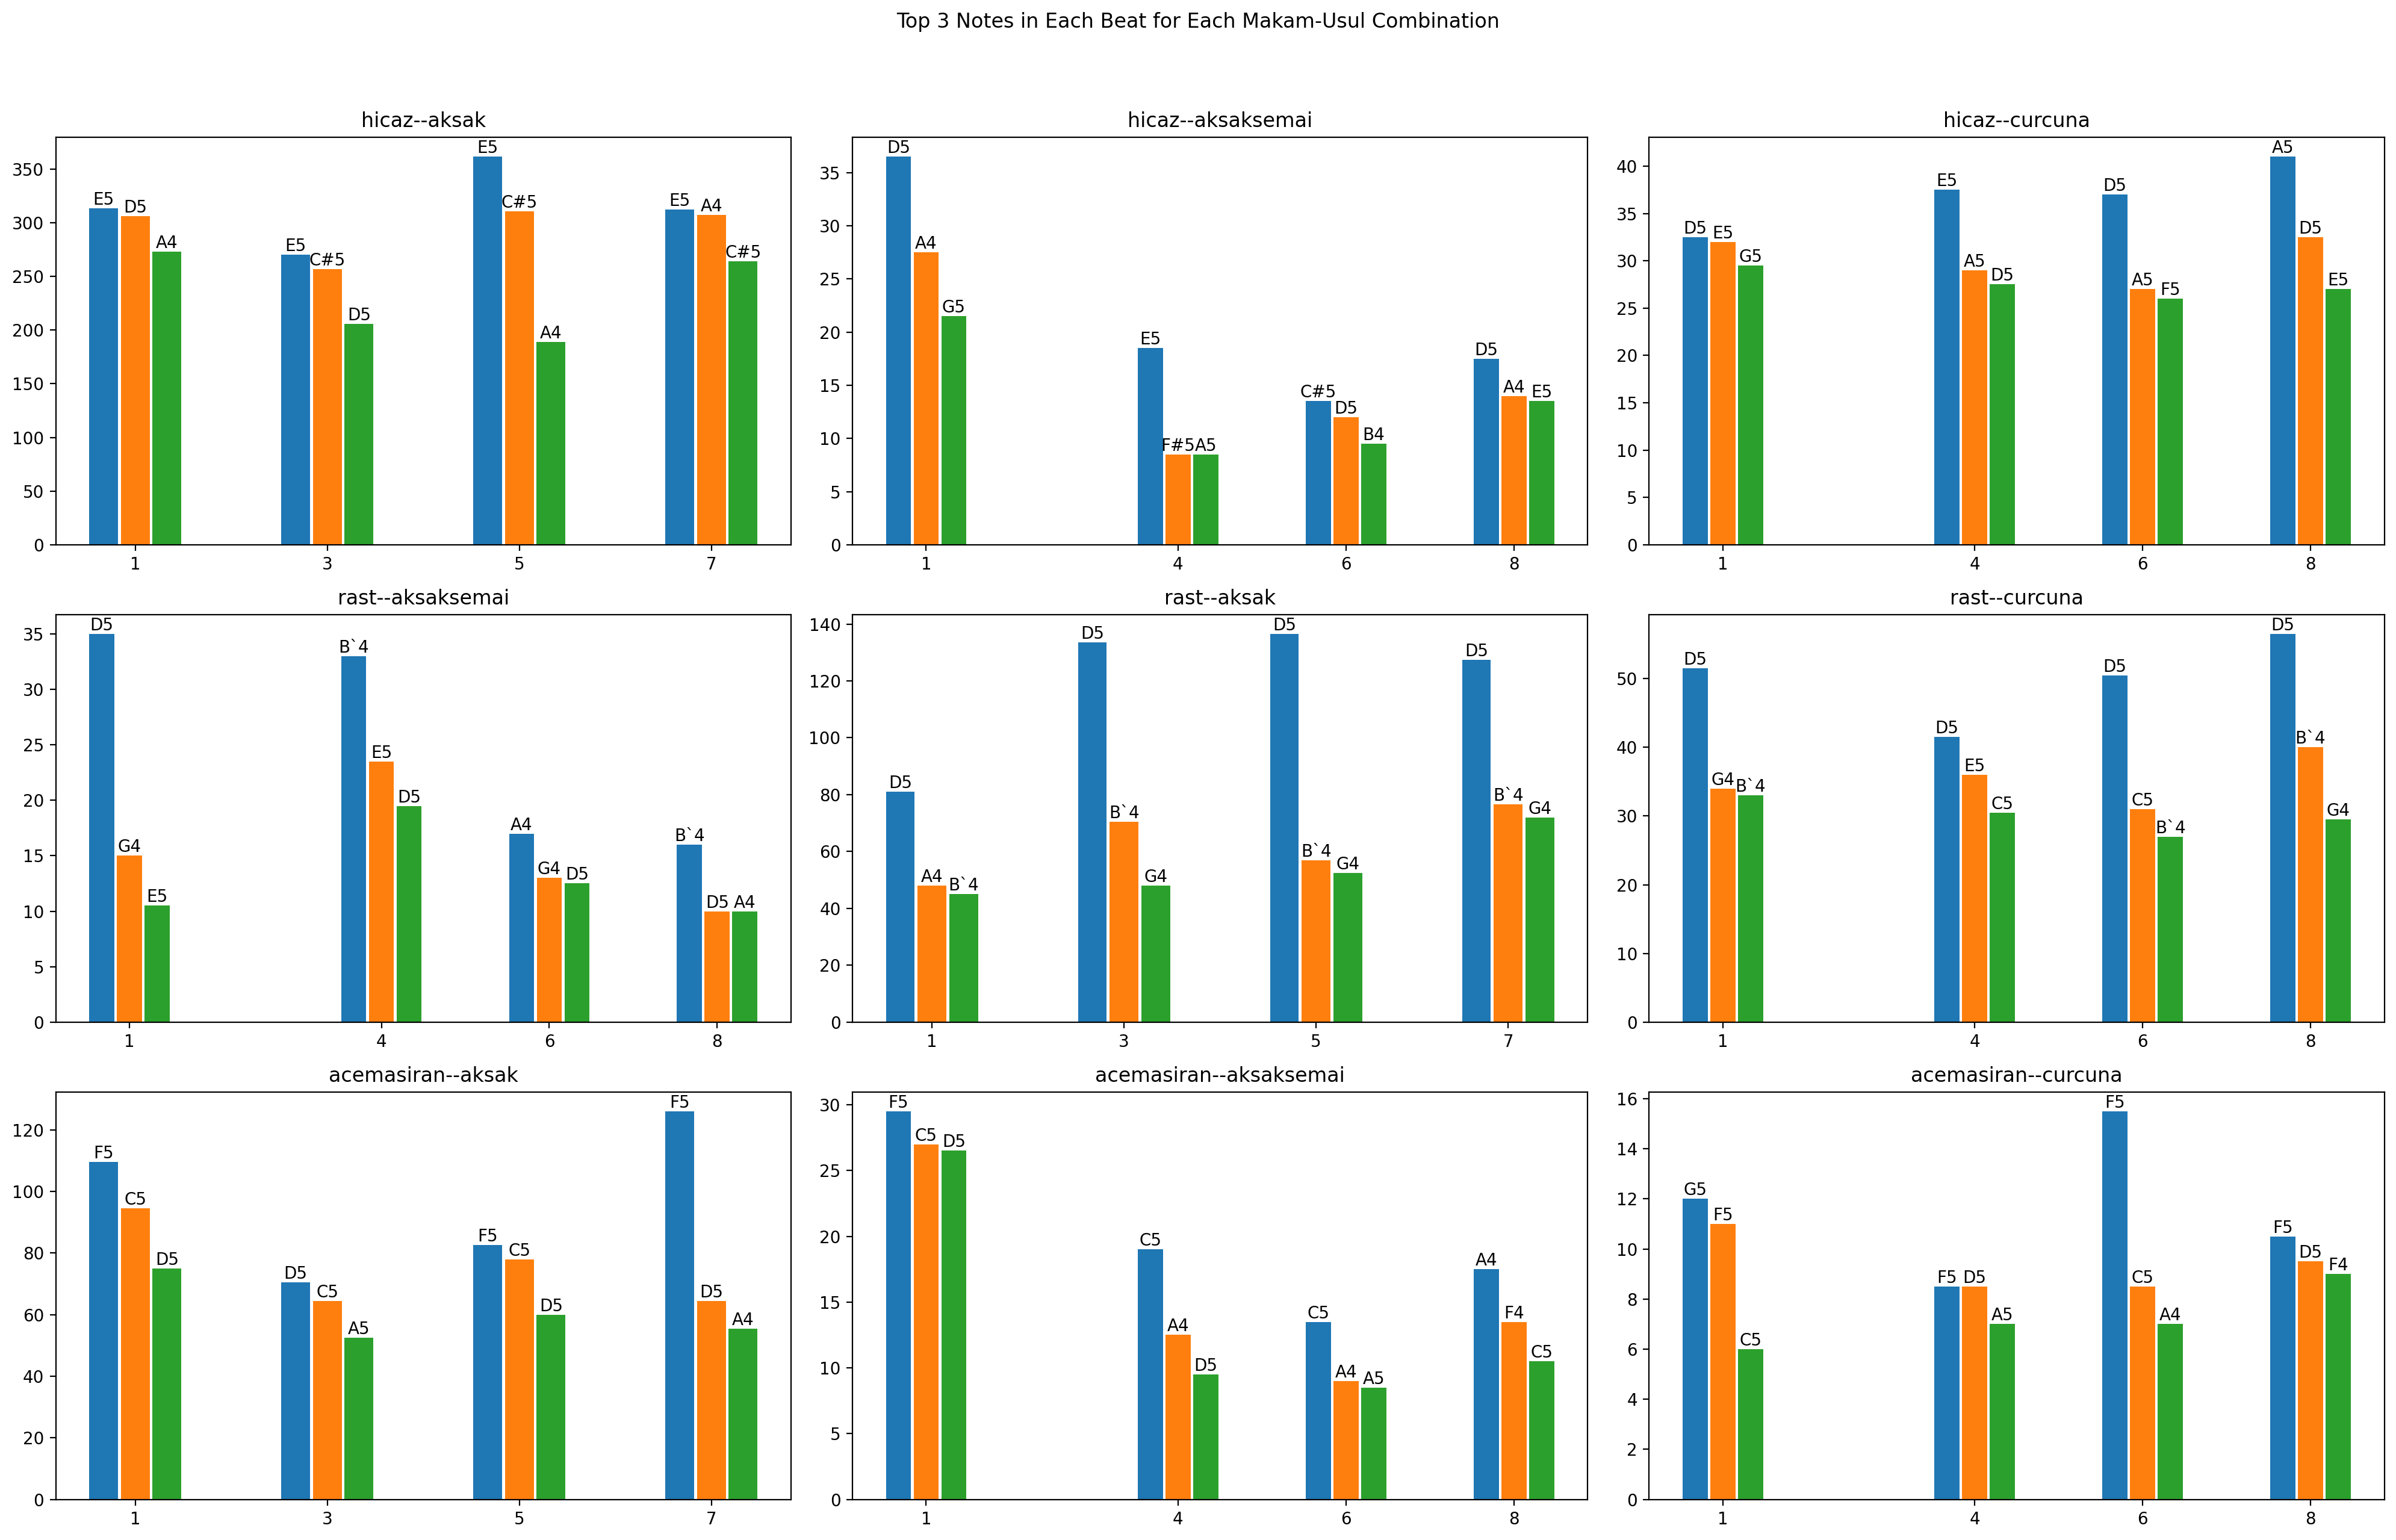

In [17]:
i,j = 0,0
fig, axs = plt.subplots(3, 3, figsize=(20, 13))
fig.suptitle('Top 3 Notes in Each Beat for Each Makam-Usul Combination')
bar_width = 0.3
for combo in note_beat_dict:
    xValues = note_beat_dict[combo].keys()
    top_1 = []
    top_2 = []
    top_3 = []
    for beat in note_beat_dict[combo]:
        yValues = note_beat_dict[combo][beat]
        # sort the yValues in descending order of their values 
        yValues = sorted(yValues.items(), key=lambda item: item[1], reverse=True)
        yValues = yValues[:3]
        for k in range(len(yValues)):
            if k == 0:
                top_1.append(yValues[k])
            elif k == 1:
                top_2.append(yValues[k])
            elif k == 2:
                top_3.append(yValues[k])


    top_1_bar = []
    top_1_label = []
    for tuple in top_1:
        top_1_bar.append(tuple[1])
        top_1_label.append(tuple[0])
    
    top_2_bar = []
    top_2_label = []
    for tuple in top_2:
        top_2_bar.append(tuple[1])
        top_2_label.append(tuple[0])

    top_3_bar = []
    top_3_label = []
    for tuple in top_3:
        top_3_bar.append(tuple[1])
        top_3_label.append(tuple[0])

    if combo[-5:] == "aksak":
        bar1 = axs[i,j].bar(aksak_pre, top_1_bar, bar_width, label=top_1_label)
        bar2 = axs[i,j].bar(aksakBeats, top_2_bar, bar_width, label=top_2_label)
        bar3 = axs[i,j].bar(aksak_post, top_3_bar, bar_width, label=top_3_label)
        axs[i,j].set_xticks(aksakBeats)
        for bar, label in zip(bar1, top_1_label):
            axs[i,j].text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
                     label, ha='center', va='bottom')

        for bar, label in zip(bar2, top_2_label):
            axs[i,j].text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
                     label, ha='center', va='bottom')

        for bar, label in zip(bar3, top_3_label):
            axs[i,j].text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
                     label, ha='center', va='bottom')
        axs[i,j].set_title(combo)

    if "aksaksemai" in combo:
        bar1 = axs[i,j].bar(aksaksemai_pre, top_1_bar, bar_width, label=top_1_label)
        bar2 = axs[i,j].bar(aksaksemaiBeats, top_2_bar, bar_width, label=top_2_label)
        bar3 = axs[i,j].bar(aksaksemai_post, top_3_bar, bar_width, label=top_3_label)
        axs[i,j].set_xticks(aksaksemaiBeats)
        for bar, label in zip(bar1, top_1_label):
            axs[i,j].text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
                     label, ha='center', va='bottom')

        for bar, label in zip(bar2, top_2_label):
            axs[i,j].text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
                     label, ha='center', va='bottom')

        for bar, label in zip(bar3, top_3_label):
            axs[i,j].text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
                     label, ha='center', va='bottom')
        axs[i,j].set_title(combo)

    if "curcuna" in combo:
        bar1 = axs[i,j].bar(curcuna_pre, top_1_bar, bar_width, label=top_1_label)
        bar2 = axs[i,j].bar(curcunaBeats, top_2_bar, bar_width, label=top_2_label)
        bar3 = axs[i,j].bar(curcuna_post, top_3_bar, bar_width, label=top_3_label)
        axs[i,j].set_xticks(curcunaBeats)
        for bar, label in zip(bar1, top_1_label):
            axs[i,j].text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
                     label, ha='center', va='bottom')

        for bar, label in zip(bar2, top_2_label):
            axs[i,j].text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
                     label, ha='center', va='bottom')

        for bar, label in zip(bar3, top_3_label):
            axs[i,j].text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
                     label, ha='center', va='bottom')
        axs[i,j].set_title(combo)
    j += 1
    if j == 3:
        i += 1
        j = 0
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()